In [1]:
import torch
from torch import nn
from torch.utils.data import Dataset

import torchvision
import torchvision.transforms.v2 as transforms

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from PIL import Image
import pandas as pd

from data_model import CelebADataset, ToTensorWithBBox, ResizeWithBBox

In [2]:
transform = transforms.Compose([
    ResizeWithBBox((224, 224)),
    ToTensorWithBBox()
])
dataset_bbox = CelebADataset(image_dir="./data_bbox/celeba/img_align_celeba/",
                             bbox_file="./data_bbox/celeba/list_bbox_celeba.txt",
                             sizes_file="./data_bbox/celeba/list_sizes_celeba.txt",
                             transform=transform)

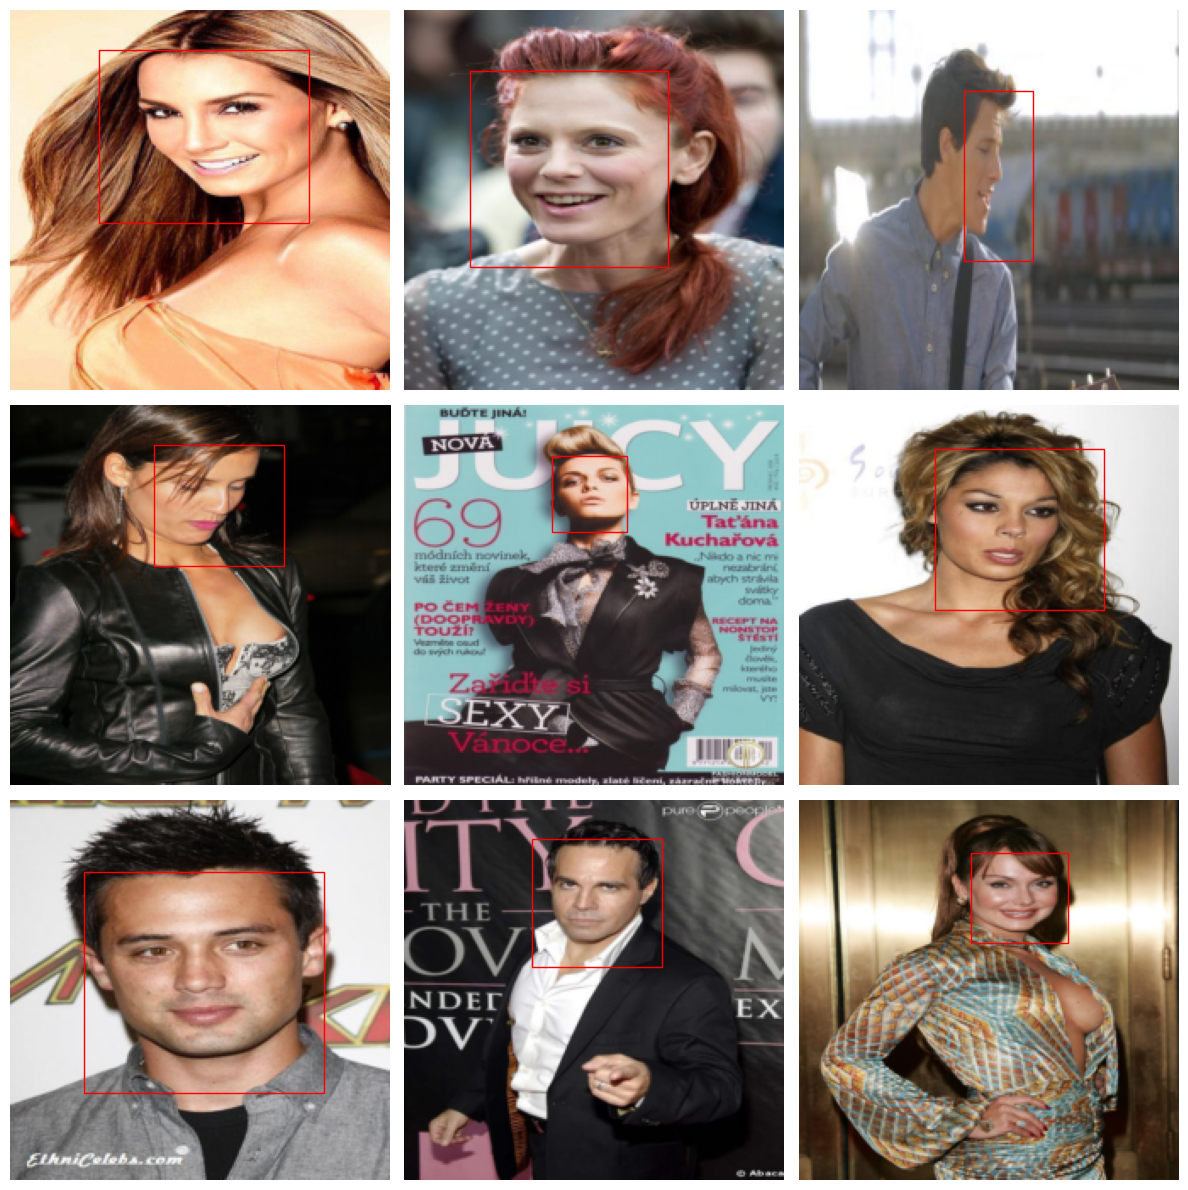

In [3]:
# Create a 3x3 grid for plotting
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for i, ax in enumerate(axes.flatten()):
    img, bbox = dataset_bbox[i]
    bbox = bbox.tolist()

    # Convert tensor to numpy image for plotting
    img_np = img.permute(1, 2, 0).numpy()

    # Display the image
    ax.imshow(img_np)

    # Draw bounding box
    x, y, w, h = bbox
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='red', facecolor='none')
    ax.add_patch(rect)

    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()